In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

# OBJETIVO = Prever a velocidade que o carro estava, baseado na distancia que ele levou para parar.

In [3]:
base = pd.read_csv('cars.csv')

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis=1)

In [6]:
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [7]:
# X é a variável independente
#vamos pegar todas as linhas da coluna 1
X = base.iloc[:, 1].values

In [8]:
X 

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [9]:
X = X.reshape(-1, 1)

In [10]:
X

array([[  2],
       [ 10],
       [  4],
       [ 22],
       [ 16],
       [ 10],
       [ 18],
       [ 26],
       [ 34],
       [ 17],
       [ 28],
       [ 14],
       [ 20],
       [ 24],
       [ 28],
       [ 26],
       [ 34],
       [ 34],
       [ 46],
       [ 26],
       [ 36],
       [ 60],
       [ 80],
       [ 20],
       [ 26],
       [ 54],
       [ 32],
       [ 40],
       [ 32],
       [ 40],
       [ 50],
       [ 42],
       [ 56],
       [ 76],
       [ 84],
       [ 36],
       [ 46],
       [ 68],
       [ 32],
       [ 48],
       [ 52],
       [ 56],
       [ 64],
       [ 66],
       [ 54],
       [ 70],
       [ 92],
       [ 93],
       [120],
       [ 85]])

In [11]:
# y a variável dependente
y = base.iloc[:, 0].values

In [12]:
y

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25])

In [13]:
#calcular a correlação das variáveis
correlacao = np.corrcoef(X, y)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [14]:
correlacao

NameError: name 'correlacao' is not defined

![](correlacao.jpeg)

In [15]:
#vamos criar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#intercção do modelo
modelo.intercept_

8.283905641787172

In [17]:
#inclinação
modelo.coef_

array([0.16556757])

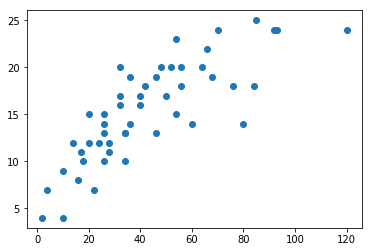

In [18]:
plt.scatter(X, y)

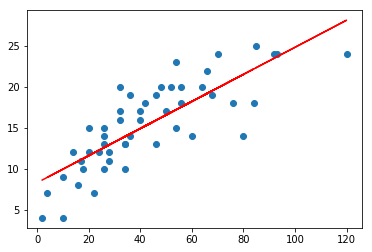

In [19]:
#traçando a linha da regressão
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = "red")

In [20]:
#fazendo a previsão Ex.1

#DISTANCIA 22 PÉS

modelo.intercept_ + (modelo.coef_ * 22)

array([11.92639228])

In [21]:
#fazendo a previsão Ex.2

#DISTANCIA 22 PÉS
prev = [22]
modelo.predict([prev])

array([11.92639228])

In [23]:
#vendo os dados residuais
modelo._residues

478.02124836119646

In [25]:
#!pip install yellowbrick --user


  Using cached https://files.pythonhosted.org/packages/d1/cf/6d6ab47c0759d246262f9bdb53e89be3814bf1774bc51fffff995f5859f9/yellowbrick-1.0.1-py3-none-any.whl


In [26]:
from yellowbrick.regressor import ResidualsPlot

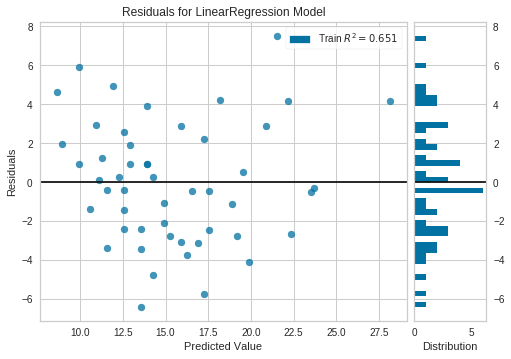

In [27]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()
